In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from collections import OrderedDict


In [2]:
dams_with_upstream_dams = OrderedDict([
    ('Barkley_Dam', 'Barkley'),
    ('Old_Hickory_Dam', 'Old Hickory'),
    ('Cordell_Hull_Dam' , 'Cordell Hull'),
    ('Wolf_Creek', 'Wolf Creek')
])

In [3]:
fn = Path("/tiger1/pdas47/resorr-swot/results/resorr-swot-stats/weekly.csv")
df = pd.read_csv(fn)
df

,reservoir_id,with_or_without_resorr,reservoir_name,metric,metric_value
0,8,with resorr,Cordell_Hull_Dam,NSE,-1.101349
1,8,without resorr,Cordell_Hull_Dam,NSE,-1.168901
2,8,with resorr,Cordell_Hull_Dam,MAE,2084.681007
3,8,without resorr,Cordell_Hull_Dam,MAE,2330.489587
4,8,with resorr,Cordell_Hull_Dam,RMSE,2853.016260
5,8,without resorr,Cordell_Hull_Dam,RMSE,2898.511124
6,8,with resorr,Cordell_Hull_Dam,KGE,-0.433717
7,8,without resorr,Cordell_Hull_Dam,KGE,-0.547977
8,8,with resorr,Cordell_Hull_Dam,rsquared,0.022718
9,8,without resorr,Cordell_Hull_Dam,rsquared,0.330142


In [4]:
df['metric'].unique()

array(['NSE', 'MAE', 'RMSE', 'KGE', 'rsquared', 'spearman_r'],
      dtype=object)

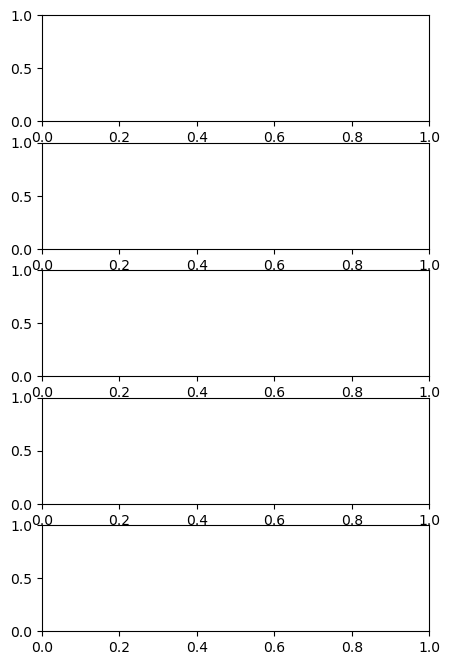

In [5]:
fig, axes = plt.subplots(nrows=5, figsize=[5, 8])

/tmp/ipykernel_1934787/2067104353.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


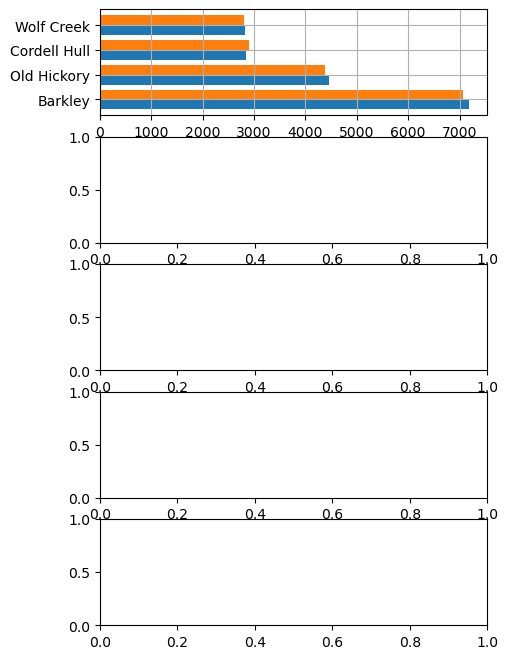

In [6]:
METRIC = 'RMSE'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")

df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[0], width=0.8)
axes[0].set_title(None)
axes[0].set_xlabel(f'{METRIC}')
axes[0].grid()
legend = axes[0].legend()
legend.remove()
axes[0]
fig

/tmp/ipykernel_1934787/1319343013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


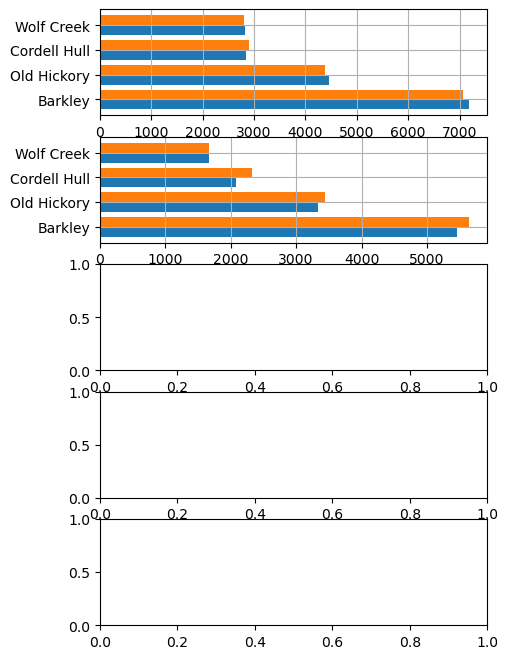

In [7]:
METRIC = 'MAE'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[1], width=0.8)
axes[1].set_title(None)
axes[1].set_xlabel(f'{METRIC}')
axes[1].grid()
legend = axes[1].legend()
legend.remove()
axes[1]
fig

/tmp/ipykernel_1934787/2157951968.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


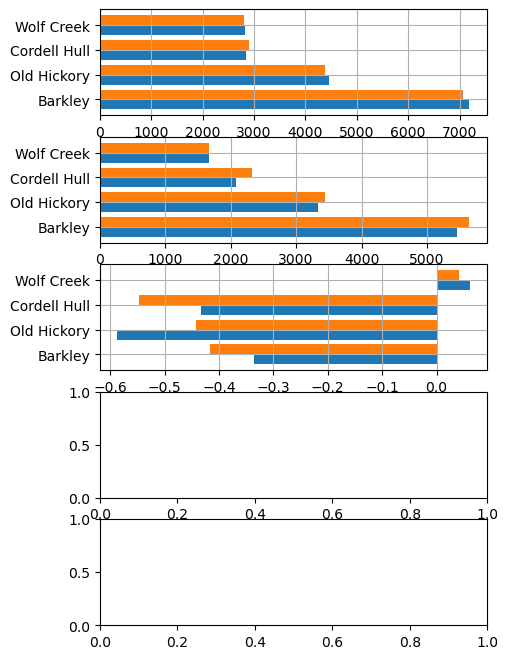

In [8]:
METRIC = 'KGE'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[2], width=0.8)
axes[2].set_title(None)
axes[2].set_xlabel(f'{METRIC}')
axes[2].grid()
legend = axes[2].legend()
legend.remove()
fig

/tmp/ipykernel_1934787/604814856.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


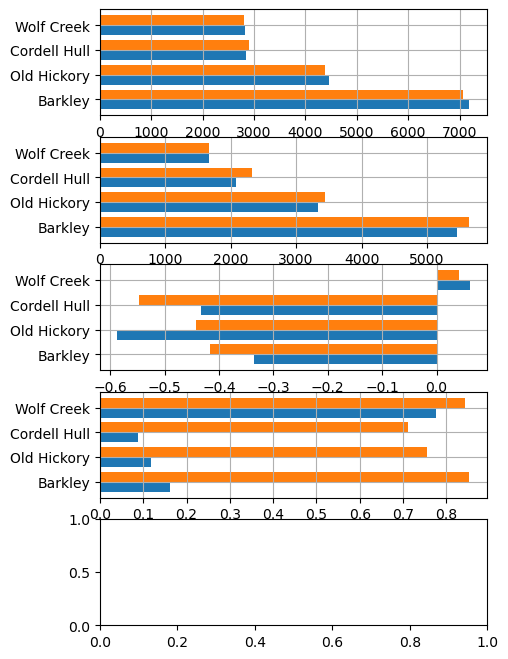

In [9]:
METRIC = 'spearman_r'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[3], width=0.8)
axes[3].set_title(None)
axes[3].set_xlabel(f'{METRIC}')
axes[3].grid()
legend = axes[3].legend()
legend.remove()
fig

/tmp/ipykernel_1934787/1694693166.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)


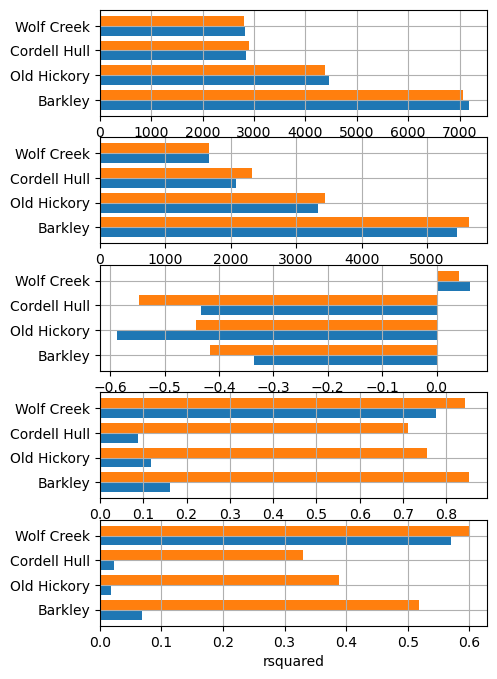

In [10]:
METRIC = 'rsquared'
df_metric = df[df['metric']==METRIC]
# Pivot to get with/without as separate columns
df_metric['reservoir_name'] = pd.Categorical(df_metric['reservoir_name'], categories=dams_with_upstream_dams.keys(), ordered=True)
df_pivot = df_metric.pivot(index="reservoir_name", columns="with_or_without_resorr", values="metric_value")
df_pivot = df_pivot[df_pivot.index.isin(list(dams_with_upstream_dams.keys()))]
df_pivot = df_pivot.rename({
    'with resorr': 'Upstream dams considered',
    'without resorr': 'Upstream dams not considered'
}, axis=1)
df_pivot['pretty_names'] = df_pivot.index.to_series().apply(
    lambda x: dams_with_upstream_dams[x]
)
df_pivot = df_pivot.set_index('pretty_names', drop=True)
df_pivot.index.name = None

df_pivot.plot(kind="barh", ax=axes[4], width=0.8)
axes[4].set_title(None)
axes[4].set_xlabel(f'{METRIC}')
axes[4].grid()
legend = axes[4].legend()
legend.remove()
fig

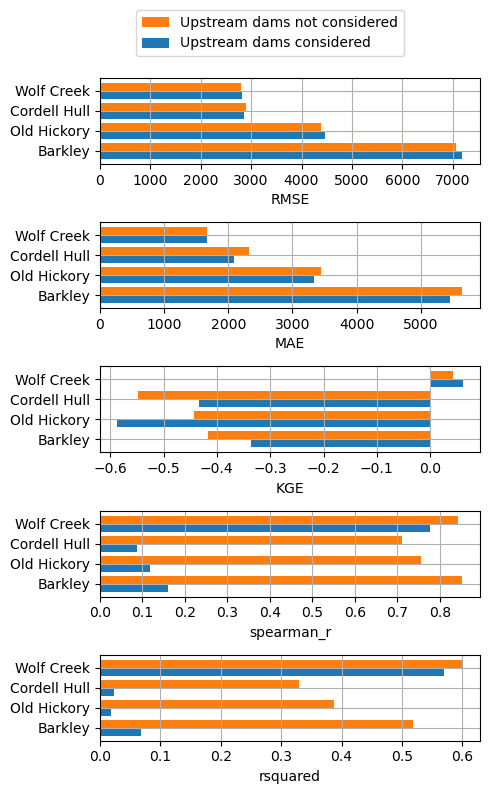

In [11]:
handles, labels = axes[0].get_legend_handles_labels()
# handles = handles[:2]
# labels = labels[:2]

fl = fig.legend(handles=handles[::-1], labels=labels[::-1], loc='lower center', ncols=1, bbox_to_anchor=[0.55, 0.92])
# fl.set_title("Upstream dams")

fig.tight_layout(rect=[0, 0, 1, 0.92])
fig

In [12]:
fig.savefig(
    Path(f'/tiger1/pdas47/resorr-swot/results/resorr-swot-stats/weekly-metrics.png'), dpi=900
)
fig.savefig(
    Path(f'/tiger1/pdas47/resorr-swot/results/resorr-swot-stats/weekly-metrics.svg')
)